In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [6]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Logistic Regression with one variable

In [10]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [13]:
X.shape, y.shape

((150, 1), (150,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [19]:
log_reg.coef_, log_reg.intercept_

(array([[3.83050665]]), array([-6.32263658]))

In [23]:
X_new = [[2.0], [0.5]]

print(log_reg.predict_proba(X_new))

print(log_reg.predict(X_new))

[[0.20777713 0.79222287]
 [0.98795971 0.01204029]]
[ True False]


Decision boundary

In [24]:
-log_reg.intercept_/log_reg.coef_

array([[1.6506006]])

In [25]:
X_new = [[1.6], [0.2], [2.2], [3.1] ]

print(log_reg.predict_proba(X_new))p

print(log_reg.predict(X_new))

[[0.54830535 0.45169465]
 [0.99615272 0.00384728]
 [0.10866234 0.89133766]
 [0.00386495 0.99613505]]
[False False  True  True]


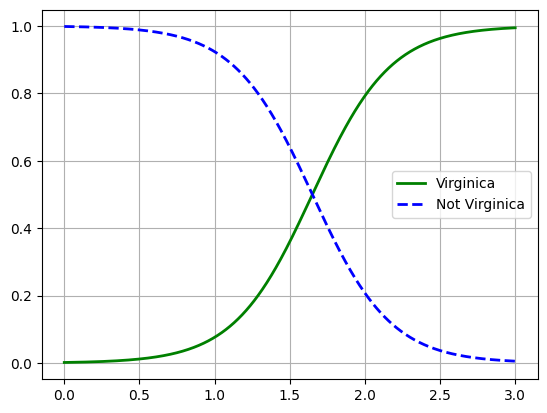

In [27]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_prab = log_reg.predict_proba(X_new)

plt.plot(X_new, y_prab[:,1], "g-", linewidth=2, label="Virginica" )
plt.plot(X_new, y_prab[:,0], "b--", linewidth=2, label="Not Virginica" )
plt.legend()
plt.grid()
plt.show()


# Logistic Regression with multiple variables

In [29]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [30]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
log_reg_2 = LogisticRegression(random_state=42)
log_reg_2.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
log_reg_2.intercept_, log_reg_2.coef_

(array([-15.81793954]), array([[2.56143021, 2.00397536]]))

In [33]:
log_reg_2.predict_proba([ [0.2, 2] ])

array([[9.99987599e-01, 1.24012265e-05]])

In [35]:
15.8179/2.56143

6.175417637803883